# Zaptc ("zapticy")
Perturb the state of a node. Propagate potential node state changes downstream. Count the number of every (state0,state1) system-state transition as the network is walked.  Walk for a given number of time-steps. At each node the propagation spreads to all of its downstream nodes.

### Table of Contents <a id=toc>
* [Imports and setup](#init)
* [Create graph](#creategraph)
* [Run Zaptc](#zaptc)
* [Explore results](#results)

## Imports and setup <a id=init>

In [1]:
from random import choice
from collections import Counter
from statistics import mean

import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout, pydot_layout
import numpy as np

import pyphi.data_models as dm
from pyphi.zap_tc import Zaptc

In [2]:
N = 20 # number of Nodes in system
D = 3  # Degree; average number of connections from a node to downstream nodes
S = 2  # number of States per node
T = 10 # number of time steps to follow transitions

p = D/N

print(f'''
{N}\t# number of Nodes
{D}\t# maximum number of Connections from a node
{S}\t# number of States per node
{p}\t# probability of edge creation for each node pairing

{D**10:,}\t# average nodes changed as a result of propagation fan-out fron single node
''')
# {labels} # node labels


20	# number of Nodes
3	# maximum number of Connections from a node
2	# number of States per node
0.15	# probability of edge creation for each node pairing

59,049	# average nodes changed as a result of propagation fan-out fron single node



## Create graph <a id=creategraph>

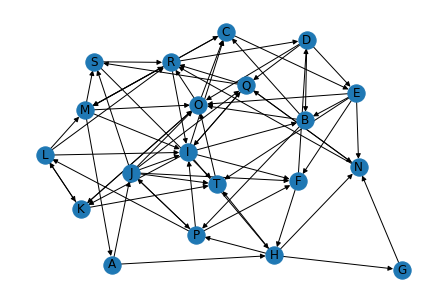

In [3]:
#g = nx.gnp_random_graph(60, 0.10, directed=True) # num_nodes, prob_edge
G = nx.gnp_random_graph(N, p, directed=True) # num_nodes, prob_edge
edges = list(G.edges())
net = dm.Net(edges=edges)

#Image(filename=png, width=500)
#nx.draw(net.graph, pos=pydot_layout(net.graph), with_labels=True, label='gnp_random_graph({N},{p})')
net.draw()

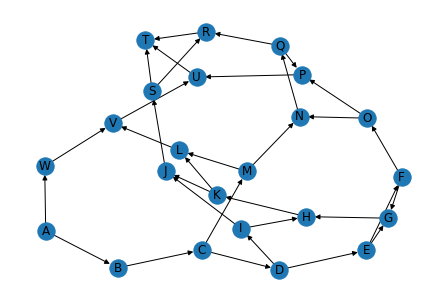

In [4]:
p = 23  # myst be prime
G = nx.chordal_cycle_graph(p) # an Expander graph
edges = list(G.edges())
net = dm.Net(edges=edges)

net.draw()

In [5]:
print(nx.info(net.graph))

label0 = sorted(net.graph.nodes())[0]
print()
print(f'label0="{label0}"')
print(f'Downstream nodes of {label0} = {list(net.graph.neighbors(label0))}')

Name: 
Type: DiGraph
Number of nodes: 23
Number of edges: 36
Average in degree:   1.5652
Average out degree:   1.5652

label0="A"
Downstream nodes of A = ['W', 'B', 'A']


### Change some individual nodes 

#### Add a state to node A (disabled)

#### Set node B to single state (disabled)

## Run Zaptc <a id=zaptc>

In [6]:
ztc = Zaptc(net=net)
ztc

In [7]:
len(ztc.net)

23

In [8]:
list(ztc.net.successors(label0))

['W', 'B', 'A']

In [9]:
list(ztc.net.get_node('A').states)

[0, 1]

In [10]:
start_state = '0'*len(ztc.net)
print(f'start_state = "{start_state}", start_label="{label0}"\n')
%time ztc.zap_tc(label0, start_state, T)

start_state = "00000000000000000000000", start_label="A"

CPU times: user 4.25 ms, sys: 211 µs, total: 4.46 ms
Wall time: 4.47 ms


## Results <a id=results>

In [11]:
print(nx.info(net.graph))

Name: 
Type: DiGraph
Number of nodes: 23
Number of edges: 36
Average in degree:   1.5652
Average out degree:   1.5652


In [12]:
nstates = len(set([s1 for s1,s2 in ztc.transition_counter.keys()]).intersection([s2 for s1,s2 in ztc.transition_counter.keys()]))
print(f'Number of unique transitions = {len(ztc.transition_counter)}')
print(f'total transitions = {sum(ztc.transition_counter.values())}')
print(f'num system-states = {nstates}')
# state_list

Number of unique transitions = 633
total transitions = 908
num system-states = 288


In [13]:
print(f'{len(ztc.transition_counter):,}\tUnique transitions observed')

633	Unique transitions observed


In [14]:
%time ztc.zapall(T)

Zap node: A state: .1.11..11....11.11..1.1
Zap node: B state: 11...1..1..11..111.111.
Zap node: C state: 111.1.1.111....11.11..1
Zap node: D state: ..1.1.11.11111....1..1.
Zap node: E state: 1..111..111..1...1...11
Zap node: F state: 1......1.1..1..1...1111
Zap node: G state: ...1..1.1.111111..1.1.1
Zap node: H state: 111..11.1.1.1.11..1....
Zap node: I state: .1..111....1.1111111..1
Zap node: J state: 1...11.....1....1111111
Zap node: K state: 111..11.1.1.1.1..1...11
Zap node: L state: ..11...1.111.......1.1.
Zap node: M state: .111.1.1111....1.1...1.
Zap node: N state: ..1..111.11.1..1..11111
Zap node: O state: 11.....11.111..1.111111
Zap node: P state: 1...1.1..1..111.11.11..
Zap node: Q state: ...1..1..111111..111111
Zap node: R state: .111.1...1111..1.11....
Zap node: S state: 1.111..111...1...1111..
Zap node: T state: ..11.....1....11111.1..
Zap node: U state: .1..11.1....11..1.11111
Zap node: V state: .1.1....11.11....1....1
Zap node: W state: ..1..1.11111..111.1.1..
CPU times: 

In [15]:
instates = set(s1 for s1,s2 in ztc.transition_counter.keys())
outstates = set(s2 for s1,s2 in ztc.transition_counter.keys())
#nstates = len(instates.union(outstates))
maxnstates = S**len(ztc.net)
print(f'''
{len(instates):,}  \t Number of IN  states encountered
{len(outstates):,} \t Number of OUT  states encountered


{len(instates-outstates):,}  \t Number of IN-OUT states encountered
{len(outstates-instates):,}  \t Number of OUT-IN states encountered
{len(outstates&instates):,}  \t Number of COMMON (in/out) states encountered
=======
{len(outstates|instates):,}  \t Number of COMBINED (in/out) states encountered

{maxnstates:,}\t Number of possible states

{len(instates)*len(outstates):,} \t Values needed for rectangular TPM 
{len(ztc.transition_counter):,}\t\t Unique transitions observed (compare to rectangular TPM size)
{sum(ztc.transition_counter.values()):,}\t TOTAL transitions observed

{maxnstates**2:,}\t Number of POSSIBLE transitions
''')


842  	 Number of IN  states encountered
1,107 	 Number of OUT  states encountered


11  	 Number of IN-OUT states encountered
276  	 Number of OUT-IN states encountered
831  	 Number of COMMON (in/out) states encountered
1,118  	 Number of COMBINED (in/out) states encountered

8,388,608	 Number of possible states

932,094 	 Values needed for rectangular TPM 
1,733		 Unique transitions observed (compare to rectangular TPM size)
2,454	 TOTAL transitions observed

70,368,744,177,664	 Number of POSSIBLE transitions



In [16]:
ztc.transition_counter

Counter({('10000000000000000000000', '00000000000000000000001'): 1,
         ('00000000000000000000001', '00000000000000000000001'): 10,
         ('00000000000000000000001', '00000000000000000000101'): 3,
         ('00000000000000000000101', '00000000000000000000101'): 4,
         ('00000000000000000000001', '00000000000000000000000'): 4,
         ('00000000000000000000000', '00000000000000000000100'): 3,
         ('00000000000000000000100', '00000000000000000000100'): 2,
         ('00000000000000000000000', '00000000000000000000001'): 2,
         ('00000000000000000000001', '00000000000000000001001'): 2,
         ('00000000000000000001001', '00000000000000000001001'): 2,
         ('00000000000000000000000', '00000000000000000000000'): 14,
         ('00000000000000000000000', '00000000000000000000010'): 4,
         ('00000000000000000000010', '00000000000000000000010'): 1,
         ('00000000000000000000010', '00000000000000000001010'): 1,
         ('00000000000000000001010', '00000000

In [17]:
ztc.tpm_sbn

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
10100000000010000000000,0.25,0,0.25,0,0,0,0,0,0,0,...,0,0,0,0.25,0,0,0,0,0,0
00100001100001101100100,0,0,0.111111,0,0,0,0,0.111111,0.111111,0.111111,...,0.111111,0.111111,0,0.111111,0.111111,0,0,0.111111,0,0
00101111101000000000001,0,0,0.111111,0,0.111111,0.111111,0.111111,0.111111,0.111111,0,...,0,0,0,0,0,0,0,0,0,0.111111
10101000111100000000000,0.285714,0,0.285714,0,0.285714,0,0,0,0.285714,0.285714,...,0,0,0,0,0,0,0,0,0,0
01000111000001010000101,0,0.111111,0,0,0,0.111111,0.111111,0.111111,0,0,...,0.111111,0,0.111111,0,0,0,0.111111,0.111111,0,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011001100001101100001,0.0909091,0,0,0.0909091,0.0909091,0,0,0.0909091,0.0909091,0,...,0.0909091,0.0909091,0,0.0909091,0.0909091,0,0.0909091,0,0,0.0909091
10000101011100111101110,0.0833333,0,0,0,0,0.0833333,0,0.0833333,0,0.0833333,...,0,0.0833333,0.0833333,0.0833333,0.0833333,0,0,0.0833333,0.0833333,0
01000000000110000000001,0,0.2,0,0,0,0,0,0,0,0,...,0,0,0,0.2,0,0,0,0,0,0.2
00010000100111110010101,0,0,0,0.0909091,0,0,0,0,0.0909091,0,...,0.0909091,0.0909091,0.0909091,0,0,0.0909091,0.0909091,0.0909091,0,0.0909091


In [18]:
ztc.net.nodes

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [19]:
list(G.edges.items())[0]

((0, 22, 0), {})

In [20]:
len(net.nodes)

23

In [21]:
ztc.tpm_sbn()

TypeError: 'DataFrame' object is not callable